In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", False)
from sklearn.metrics import mean_absolute_percentage_error
from datetime import date, timedelta, datetime

In [2]:
df = pd.read_csv('../raw_data/data_preparation.csv', index_col=[0])


In [3]:
# test

In [4]:
Date_debut_test = '2022-01-01'    # <= Inférieur ou Egal
Nombre_jours_test = 14

Date_debut_test_time_ = pd.to_datetime(Date_debut_test)
Date_fin_test_time_ =  Date_debut_test_time_ + timedelta(Nombre_jours_test)
Date_fin_test = str(Date_fin_test_time_)[0:10]
Date_fin_test

'2022-01-15'

In [5]:
type(Date_debut_test)

str

In [6]:
df_train = df[ (df["Date"] < Date_debut_test)]
df_test = df[ (df["Date"] >= Date_debut_test) & (df["Date"] < Date_fin_test)]

In [7]:
print(df_train.shape)
print(df_test.shape)

(3255, 85)
(14, 85)


In [8]:
df_train

,Date,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30,YEAR,MONTH,DAY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,...,bank_holiday,school_holidays,season,num_day,sin365_1,cos365_1,sin365_2,cos365_2,sin365_3,cos365_3,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12,t - 13,t - 14,t - 15,t - 16,t - 17,t - 18,t - 19,t - 20,t - 21,t - 22,t - 23,t - 24,t - 25,t - 26,t - 27,t - 28,t - 29,t - 30
32,2013-02-02,4464,262321.0,15464.0,0.0,1574.0,2710.0,57188.0,0.0,3215.0,182068.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2013,2,2,5.55,2.13,3.84,5.69,7.38,8.87,1.48,4.82,79.19,1.94,95.99,12.23,15.88,...,0.0,0,1,33,0.537677,0.843151,0.906686,0.421806,0.764891,-0.644159,266134.0,268874.0,285681.0,303496.0,303546.0,298866.0,309993.0,321288.0,313799.0,314414.0,306209.0,309629.0,290859.0,325285.0,347705.0,346695.0,332304.0,326236.0,305170.0,280488.0,278107.0,280801.0,284001.0,283434.0,280984.0,270102.0,257432.0,267848.0,286799.0,285526.0
33,2013-02-03,4464,273743.0,15644.0,0.0,1273.0,3718.0,58723.0,0.0,3211.0,191068.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2013,2,3,2.96,-2.28,0.33,3.13,9.71,8.87,-0.84,3.30,69.88,0.02,97.48,9.45,12.35,...,0.0,0,1,34,0.552101,0.833777,0.920659,0.390368,0.718792,-0.695225,262321.0,266134.0,268874.0,285681.0,303496.0,303546.0,298866.0,309993.0,321288.0,313799.0,314414.0,306209.0,309629.0,290859.0,325285.0,347705.0,346695.0,332304.0,326236.0,305170.0,280488.0,278107.0,280801.0,284001.0,283434.0,280984.0,270102.0,257432.0,267848.0,286799.0
34,2013-02-04,4464,295369.0,28333.0,0.0,570.0,3381.0,78809.0,0.0,3134.0,181039.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2013,2,4,4.67,1.85,3.26,4.77,11.67,10.80,-0.88,4.52,82.94,0.00,98.21,7.31,10.12,...,0.0,0,1,35,0.566362,0.824157,0.933542,0.358468,0.669290,-0.743001,273743.0,262321.0,266134.0,268874.0,285681.0,303496.0,303546.0,298866.0,309993.0,321288.0,313799.0,314414.0,306209.0,309629.0,290859.0,325285.0,347705.0,346695.0,332304.0,326236.0,305170.0,280488.0,278107.0,280801.0,284001.0,283434.0,280984.0,270102.0,257432.0,267848.0
35,2013-02-05,4464,287424.0,38139.0,0.0,764.0,2067.0,72157.0,0.0,3162.0,171033.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2013,2,5,6.65,5.23,5.94,6.64,8.27,11.44,3.16,5.68,89.69,0.19,97.68,6.63,9.32,...,0.0,0,1,36,0.580455,0.814292,0.945320,0.326144,0.616621,-0.787260,295369.0,273743.0,262321.0,266134.0,268874.0,285681.0,303496.0,303546.0,298866.0,309993.0,321288.0,313799.0,314414.0,306209.0,309629.0,290859.0,325285.0,347705.0,346695.0,332304.0,326236.0,305170.0,280488.0,278107.0,280801.0,284001.0,283434.0,280984.0,270102.0,257432.0
36,2013-02-06,4464,294084.0,50421.0,0.0,816.0,2624.0,70043.0,0.0,3227.0,166848.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2013,2,6,2.71,0.23,1.47,2.94,7.97,6.41,-1.56,4.03,84.50,0.10,96.65,6.42,8.96,...,0.0,0,1,37,0.594376,0.804187,0.955979,0.293434,0.561034,-0.827793,287424.0,295369.0,273743.0,262321.0,266134.0,268874.0,285681.0,303496.0,303546.0,298866.0,309993.0,321288.0,313799.0,314414.0,306209.0,309629.0,290859.0,325285.0,347705.0,346695.0,332304.0,326236.0,305170.0,280488.0,278107.0,280801.0,284001.0,283434.0,280984.0,270102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2021-12-27,4464,269418.0,18573.0,0.0,468.0,1334.0,32682.0,-255.0,3173.0,213459

#  Pipeline

In [9]:
preproc_MinMaxScaler = make_pipeline(MinMaxScaler())
preproc_StandardScaler = make_pipeline(StandardScaler()) 
preproc_RobustScaler = make_pipeline( RobustScaler())

In [10]:
min_max = ['t - 1', 't - 2', 't - 3', 't - 4', 't - 5', 't - 6', 't - 7', 't - 8', 't - 9',
       't - 10', 't - 11', 't - 12', 't - 13', 't - 14', 't - 15', 't - 16',
       't - 17', 't - 18', 't - 19', 't - 20', 't - 21', 't - 22', 't - 23',
       't - 24', 't - 25', 't - 26', 't - 27', 't - 28', 't - 29', 't - 30']
stand = ['T2MDEW','T2M_RANGE']
robus = ['T2M', 'T2MWET', 'TS', 'T2M_MAX', 'T2M_MIN','QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 
         'WS10M', 'WS50M']

In [11]:
preproc = make_column_transformer(
    (preproc_MinMaxScaler, min_max),
    (preproc_StandardScaler, stand),
    (preproc_RobustScaler, robus),
    remainder="passthrough")

preproc

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['t - 1', 't - 2', 't - 3', 't - 4', 't - 5',
                                  't - 6', 't - 7', 't - 8', 't - 9', 't - 10',
                                  't - 11', 't - 12', 't - 13', 't - 14',
                                  't - 15', 't - 16', 't - 17', 't - 18',
                                  't - 19', 't - 20', 't - 21', 't - 22',
                                  't - 23', 't - 24', 't - 25', 't - 26',
                                  't - 27', 't - 28', 't - 29', 't - 30']),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['T2MDEW', 'T2M_RANGE']),
                                ('pipeline-3',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler())]),
                                 ['T2M', 'T2MWET', 'TS', 'T2M_MAX', 'T2M_MIN',
                                  'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M',
                                  'WS50M'])])

## Pilpeline XGboost

In [12]:
model_xgb = XGBRegressor(colsample_bytree = 1, 
                         gamma= 0.1, 
                         max_depth= 16, 
                         min_child_weight= 6, 
                         n_estimators= 100,
                         learning_rate=0.1)

In [13]:
pipeline_xgb_final = make_pipeline(preproc,model_xgb)
pipeline_xgb_final

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['t - 1', 't - 2', 't - 3',
                                                   't - 4', 't - 5', 't - 6',
                                                   't - 7', 't - 8', 't - 9',
                                                   't - 10', 't - 11', 't - 12',
                                                   't - 13', 't - 14', 't - 15',
                                                   't - 16', 't - 17', 't - 18',
                                                   't - 19', 't - 20', 't - 21',
                                                   't - 22', 't - 23', 't - 24',
                                                   't - 25', 't - 26', 't - 27',
                                                   't - 28', 't - 29...
                              gamma=0.1, gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=16,
                              max_leaves=None, min_child_weight=6, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, reg_alpha=None,
                              reg_lambda=None, ...))])

# Création data frame

In [14]:
X_train = df_train.drop(columns=['Date', 'Code INSEE région', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)', 'Column 30','YEAR', 'MONTH', 'DAY', 'season', 'num_day'])

y_train = df_train['Consommation (MW)']

In [15]:
X_test = df_test.drop(columns=['Date', 'Code INSEE région', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)', 'Column 30','YEAR', 
        'MONTH', 'DAY', 'season', 'num_day',
       ])

y_test = df_test['Consommation (MW)']

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3255, 56)
(3255,)
(14, 56)
(14,)


In [17]:
X_test[['t - 26', 't - 27', 't - 28', 't - 29', 't - 30']]

,t - 26,t - 27,t - 28,t - 29,t - 30
3287,300417.0,282151.0,288467.0,305131.0,292188.0
3288,299330.0,300417.0,282151.0,288467.0,305131.0
3289,292962.0,299330.0,300417.0,282151.0,288467.0
3290,303355.0,292962.0,299330.0,300417.0,282151.0
3291,312649.0,303355.0,292962.0,299330.0,300417.0
3292,296111.0,312649.0,303355.0,292962.0,299330.0
3293,291382.0,296111.0,312649.0,303355.0,292962.0
3294,304035.0,291382.0,296111.0,312649.0,303355.0
3295,301230.0,304035.0,291382.0,296111.0,312649.0
3296,291292.0,301230.0,304035.0,291382.0,296111.0


# Fit model

In [18]:
pipeline_xgb_final.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['t - 1', 't - 2', 't - 3',
                                                   't - 4', 't - 5', 't - 6',
                                                   't - 7', 't - 8', 't - 9',
                                                   't - 10', 't - 11', 't - 12',
                                                   't - 13', 't - 14', 't - 15',
                                                   't - 16', 't - 17', 't - 18',
                                                   't - 19', 't - 20', 't - 21',
                                                   't - 22', 't - 23', 't - 24',
                                                   't - 25', 't - 26', 't - 27',
                                                   't - 28', 't - 29...
                              gamma=0.1, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=16, max_leaves=0, min_child_weight=6,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [19]:
X_test.shape

(14, 56)

# Prédictions

In [20]:
predictions = []

X_test_i = pd.DataFrame([X_test.iloc[0,26:]])

X_test_0 = pd.DataFrame([X_test.iloc[0,:]])

y_i = pipeline_xgb_final.predict(X_test_0)

predictions.append(y_i[0])

In [21]:
for i in range (1,Nombre_jours_test):
    X_test_features = pd.DataFrame([X_test.iloc[i,:26]])

    
    X_test_i.iloc[0,1:] = X_test_i.iloc[0,:-1]
    X_test_i.iloc[0,0] = y_i[0]
    
    X_test_decal = pd.DataFrame(X_test_i)
    
 
    X_test_pred = pd.merge(left = X_test_features.reset_index(drop = True), right = X_test_decal.reset_index(drop = True),
                left_index = True, right_index = True)
    
    y_i= pipeline_xgb_final.predict(X_test_pred)
    

    predictions.append(y_i[0])

In [22]:
X_test_features

,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,sin_month,cos_month,week_day,sin_day,cos_day,bank_holiday,school_holidays,sin365_1,cos365_1,sin365_2,cos365_2,sin365_3,cos365_3
3300,4.82,-2.81,1.01,2.67,10.35,11.96,1.61,3.17,59.88,0.01,99.28,2.8,4.04,0.5,0.866025,4.0,-0.433884,-0.900969,0.0,0.0,0.238513,0.971139,0.463258,0.886224,0.8211,0.570784


In [23]:
len(predictions)

14

In [24]:
predictions

[244990.27,
 257328.75,
 271108.9,
 268310.22,
 275829.8,
 289391.22,
 296562.22,
 283116.7,
 275161.1,
 292029.72,
 301712.53,
 304750.06,
 306100.28,
 309367.34]

In [25]:
X_train.shape

(3255, 56)

# Lecture prédictions

In [26]:
type(y_test)

pandas.core.series.Series

In [27]:
y_test_list = y_test.tolist()

In [28]:
y_test_list

[238154.0,
 244688.0,
 264457.0,
 270029.0,
 272530.0,
 295703.0,
 307289.0,
 286384.0,
 270763.0,
 286741.0,
 303781.0,
 311252.0,
 313535.0,
 311759.0]

In [29]:
MAPE = mean_absolute_percentage_error(y_test, predictions)
MAPE

0.020387443598371847

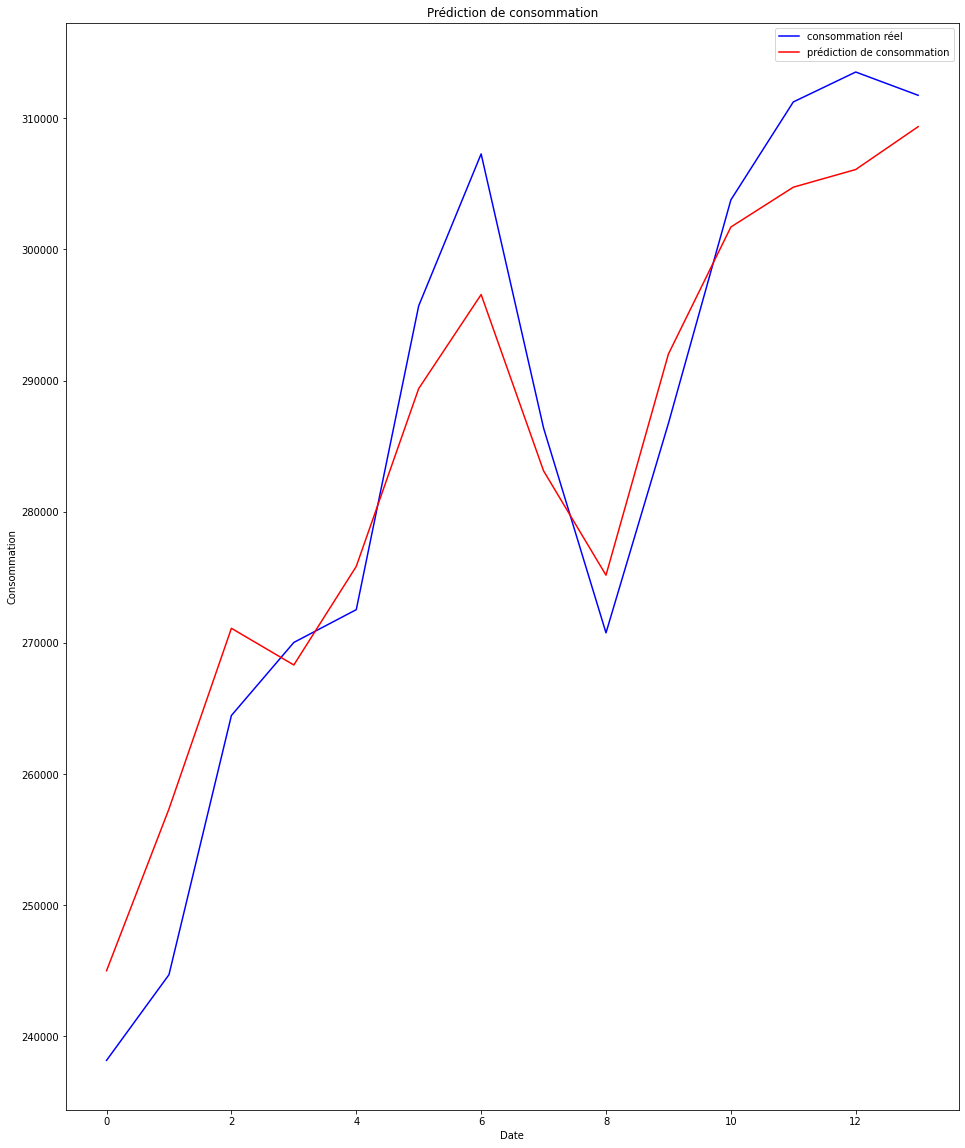

In [30]:
plt.figure(figsize=(16,20))#figsize=(10,6)
plt.plot(y_test_list, color='blue', label='consommation réel')
plt.plot(predictions, color='red', label='prédiction de consommation')
plt.title('Prédiction de consommation')
plt.xlabel('Date')
plt.ylabel('Consommation')
plt.legend()
plt.show()

In [31]:
print(f'Durée entrainement = {X_train.shape[0]} // Date fin de train = {Date_debut_test}  // Nombre jours de prédictions = {Nombre_jours_test} // MAPE = {MAPE}')

Durée entrainement = 3255 // Date fin de train = 2022-01-01  // Nombre jours de prédictions = 14 // MAPE = 0.020387443598371847


In [32]:
# Durée entrainement = 3255 // Date fin de train = 2021-12-31  // Nombre jours de prédictions = 14 // MAPE = 0.020387443598371847
# Durée entrainement = 2159 // Date fin de train = 2018-12-31  // Nombre jours de prédictions = 720 // MAPE = 0.04392174749255917
# Durée entrainement = 3133 // Date fin de train = 2021-08-31  // Nombre jours de prédictions = 14 // MAPE = 0.019562152727553097
# Durée entrainement = 3194 // Date fin de train = 2021-10-31  // Nombre jours de prédictions = 14 // MAPE = 0.02608112365233331
# Durée entrainement = 3345 // Date fin de train = 2022-03-31  // Nombre jours de prédictions = 14 // MAPE = 0.04344918094182426
# Durée entrainement = 3194 // Date fin de train = 2021-10-31  // Nombre jours de prédictions = 180 // MAPE = 0.02717062537406969

# Test des sources de productions

In [33]:
df_train.columns



Index(['Date', 'Code INSEE région', 'Consommation (MW)', 'Thermique (MW)',
       'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)', 'Hydraulique (MW)',
       'Pompage (MW)', 'Bioénergies (MW)', 'Ech. physiques (MW)',
       'Stockage batterie', 'Déstockage batterie', 'Eolien terrestre',
       'Eolien offshore', 'TCO Thermique (%)', 'TCH Thermique (%)',
       'TCO Nucléaire (%)', 'TCH Nucléaire (%)', 'TCO Eolien (%)',
       'TCH Eolien (%)', 'TCO Solaire (%)', 'TCH Solaire (%)', 'Column 30',
       'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE',
       'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M',
       'WS50M', 'sin_month', 'cos_month', 'week_day', 'sin_day', 'cos_day',
       'bank_holiday', 'school_holidays', 'season', 'num_day', 'sin365_1',
       'cos365_1', 'sin365_2', 'cos365_2', 'sin365_3', 'cos365_3', 't - 1',
       't - 2', 't - 3', 't - 4', 't - 5', 't - 6', 't - 7', 't - 8', 't - 9',
       't - 10', 't - 11', 't - 12', 't - 1

In [34]:
predictions = [244990.27,
                 257328.75,
                 271108.9,
                 268310.22,
                 275829.8,
                 289391.22,
                 296562.22,
                 283116.7,
                 275161.1,
                 292029.72,
                 301712.53,
                 304750.06,
                 306100.28,
                 309367.34]

In [35]:
df_train['Consommation (MW)']

32      262321.0
33      273743.0
34      295369.0
35      287424.0
36      294084.0
          ...   
3282    269418.0
3283    264694.0
3284    244240.0
3285    233162.0
3286    242401.0
Name: Consommation (MW), Length: 3255, dtype: float64

In [36]:
def closest(lst, K): 
      
     lst = np.asarray(lst) 
     idx = (np.abs(lst - K)).argmin() 
     return lst[idx] 
      
lst = df_train['Consommation (MW)']
K = 264990.27
proche = closest(lst, K)

In [37]:
proche

264981.0

In [38]:
data_proche = df_train.loc[df_train['Consommation (MW)'] == proche]

In [39]:
data_proche

,Date,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30,YEAR,MONTH,DAY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,...,bank_holiday,school_holidays,season,num_day,sin365_1,cos365_1,sin365_2,cos365_2,sin365_3,cos365_3,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12,t - 13,t - 14,t - 15,t - 16,t - 17,t - 18,t - 19,t - 20,t - 21,t - 22,t - 23,t - 24,t - 25,t - 26,t - 27,t - 28,t - 29,t - 30
1122,2016-01-28,4464,264981.0,50432.0,0.0,489.0,2919.0,29235.0,0.0,4849.0,177049.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,1,28,10.91,9.62,10.26,11.08,4.83,14.19,9.36,7.57,92.0,0.14,99.02,2.8,4.48,...,0.0,0,1,28,0.463258,0.886224,0.8211,0.570784,0.937342,-0.348411,273165.0,278155.0,288630.0,273699.0,279314.0,304251.0,306582.0,308347.0,318946.0,328060.0,300953.0,301477.0,301388.0,298273.0,280893.0,268430.0,260814.0,244675.0,258616.0,275317.0,291909.0,289243.0,276222.0,272288.0,254255.0,246101.0,238843.0,263864.0,262686.0,261701.0


In [40]:
 list_pc =[]

In [41]:
69000 + 1500 + 5700 + 42000 + 4200 + 122000


244400

In [42]:
thermique = data_proche['Thermique (MW)']
eolien = data_proche['Eolien (MW)']
solaire = data_proche['Solaire (MW)']
hydraulique = data_proche['Hydraulique (MW)']
bioenergies = data_proche['Bioénergies (MW)']
ech_physiques = data_proche['Ech. physiques (MW)']

In [43]:
thermique_pc = thermique/proche*100
eolien_pc = eolien/proche*100
solaire_pc = solaire/proche*100
hydraulique_pc = hydraulique/proche*100
bioenergies_pc = bioenergies/proche*100
ech_physiques_pc = ech_physiques/proche*100

In [44]:
solaire_pc

1122    1.101588
Name: Solaire (MW), dtype: float64

In [45]:
pd.DataFrame(thermique_pc)

,Thermique (MW)
1122,19.032308


In [46]:
list_pc.append(thermique_pc)
list_pc.append(eolien_pc)
list_pc.append(solaire_pc)
list_pc.append(hydraulique_pc)
list_pc.append(bioenergies_pc)
list_pc.append(ech_physiques_pc)

In [47]:
pd.DataFrame(list_pc)

,1122
Thermique (MW),19.032308
Eolien (MW),0.184542
Solaire (MW),1.101588
Hydraulique (MW),11.032867
Bioénergies (MW),1.829943
Ech. physiques (MW),66.815734


In [48]:
# https://plotly.com/python/bar-charts/

In [49]:
X_test.columns


Index(['T2M', 'T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN',
       'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M', 'WS50M', 'sin_month',
       'cos_month', 'week_day', 'sin_day', 'cos_day', 'bank_holiday',
       'school_holidays', 'sin365_1', 'cos365_1', 'sin365_2', 'cos365_2',
       'sin365_3', 'cos365_3', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 't - 8', 't - 9', 't - 10', 't - 11', 't - 12',
       't - 13', 't - 14', 't - 15', 't - 16', 't - 17', 't - 18', 't - 19',
       't - 20', 't - 21', 't - 22', 't - 23', 't - 24', 't - 25', 't - 26',
       't - 27', 't - 28', 't - 29', 't - 30'],
      dtype='object')

# KNN

## création dataframe knn

In [50]:
from sklearn.neighbors import KNeighborsRegressor

In [51]:
type(X_test)


pandas.core.frame.DataFrame

In [52]:
df_predictions = pd.DataFrame(predictions)


In [53]:
type(df_predictions)

pandas.core.frame.DataFrame

In [54]:
df_test_knn = pd.merge(left = df_predictions.reset_index(drop = True)
                       , right = X_test.reset_index(drop = True),
                left_index = True, right_index = True)
df_test_knn.rename(columns = {0: 'Consommation (MW)'}, inplace = True)

In [55]:
df_test_knn

,Consommation (MW),T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,sin_month,cos_month,week_day,sin_day,cos_day,bank_holiday,school_holidays,sin365_1,cos365_1,sin365_2,cos365_2,sin365_3,cos365_3,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12,t - 13,t - 14,t - 15,t - 16,t - 17,t - 18,t - 19,t - 20,t - 21,t - 22,t - 23,t - 24,t - 25,t - 26,t - 27,t - 28,t - 29,t - 30
0,244990.27,8.69,0.80,4.74,5.46,6.37,12.50,6.13,4.21,59.88,0.03,98.78,0.74,0.98,0.5,0.866025,5,-0.974928,-0.222521,1.0,1,0.017202,0.999852,0.034398,0.999408,0.068755,0.997634,242401.0,233162.0,244240.0,264694.0,269418.0,243273.0,241801.0,273445.0,297127.0,301828.0,307396.0,302995.0,278483.0,279167.0,296310.0,297442.0,291292.0,301230.0,304035.0,291382.0,296111.0,312649.0,303355.0,292962.0,299330.0,300417.0,282151.0,288467.0,305131.0,292188.0
1,257328.75,7.23,3.33,5.29,5.23,7.74,12.03,4.29,4.94,77.06,0.06,98.77,2.01,3.20,0.5,0.866025,6,-0.781831,0.623490,0.0,1,0.034398,0.999408,0.068755,0.997634,0.137185,0.990545,238154.0,242401.0,233162.0,244240.0,264694.0,269418.0,243273.0,241801.0,273445.0,297127.0,301828.0,307396.0,302995.0,278483.0,279167.0,296310.0,297442.0,291292.0,301230.0,304035.0,291382.0,296111.0,312649.0,303355.0,292962.0,299330.0,300417.0,282151.0,288467.0,305131.0
2,271108.90,7.55,5.88,6.72,6.68,9.41,13.44,4.03,5.92,89.75,0.00,98.29,3.44,5.31,0.5,0.866025,0,0.000000,1.000000,0.0,0,0.051584,0.998669,0.103031,0.994678,0.204966,0.978769,244688.0,238154.0,242401.0,233162.0,244240.0,264694.0,269418.0,243273.0,241801.0,273445.0,297127.0,301828.0,307396.0,302995.0,278483.0,279167.0,296310.0,297442.0,291292.0,301230.0,304035.0,291382.0,296111.0,312649.0,303355.0,292962.0,299330.0,300417.0,282151.0,288467.0
3,268310.22,8.91,7.90,8.41,8.05,8.54,13.35,4.81,6.96,92.88,0.50,97.21,2.90,4.58,0.5,0.866025,1,0.781831,0.623490,0.0,0,0.068755,0.997634,0.137185,0.990545,0.271777,0.962360,264457.0,244688.0,238154.0,242401.0,233162.0,244240.0,264694.0,269418.0,243273.0,241801.0,273445.0,297127.0,301828.0,307396.0,302995.0,278483.0,279167.0,296310.0,297442.0,291292.0,301230.0,304035.0,291382.0,296111.0,312649.0,303355.0,292962.0,299330.0,300417.0,282151.0
4,275829.80,5.06,0.26,2.66,5.30,8.38,10.08,1.70,4.21,72.38,0.39,96.61,11.54,14.89,0.5,0.866025,2,0.974928,-0.222521,0.0,0,0.085906,0.996303,0.171177,0.985240,0.337301,0.941397,270029.0,264457.0,244688.0,238154.0,242401.0,233162.0,244240.0,264694.0,269418.0,243273.0,241801.0,273445.0,297127.0,301828.0,307396.0,302995.0,278483.0,279167.0,296310.0,297442.0,291292.0,301230.0,304035.0,291382.0,296111.0,312649.0,303355.0,292962.0,299330.0,300417.0
5,289391.22,3.96,-2.68,0.64,3.49,10.48,11.05,0.58,3.23,64.31,0.02,97.37,5.04,6.99,0.5,0.866025,3,0.433884,-0.900969,0.0,0,0.103031,0.994678,0.204966,0.978769,0.401229,0.915978,272530.0,270029.0,264457.0,244688.0,238154.0,242401.0,233162.0,244240.0,264694.0,269418.0,243273.0,241801.0,273445.0,297127.0,301828.0,307396.0,302995.0,278483.0,279167.0,296310.0,297442.0,291292.0,301230.0,304035.0,291382.0,296111.0,312649.0,303355.0,292962.0,299330.0
6,296562.22,4.37,-0.37,2.00,3.21,7.42,8.73,1.31,3.85,73.06,0.00,98.04,4.36,5.97,0.5,0.866025,4,-0.433884,-0.900969,0.0,0,0.120126,0.992759,0.238513,0.971139,0.463258,0.886224,295703.0,272530.0,270029.0,264457.0,244688.0,238154.0,242401.0,233162.0,244240.0,264694.0,269418.0,243273.0,241801.0,273445.0,297127.0,301828.0,307396.0,302995.0,278483.0,279167.0,296310.0,297442.0,291292.0,301230.0,304035.0,291382.0,296111.0,312649.0,303355.0,292962.0
7,283116.70,4.73,2.75,3.74,4.83,8.85,9.53,0.68,4.82,87.44,0.20,97.84,5.27,8.02,0.5,0.866025,5,-0.974928,-0.222521,0.0,0,0.137185,0.990545,0.271777,0.962360,0.523094,0.852275,307289.0,295703.0,272530.0,270029.0,264457.0,244688.0,238154.0,242401.0,233162.0,244240.0,264694.0,269418.0,243273.0,241801.0,273445.0,297127.0,301828.0,307396.0,302995.0,278483.0,279167.0,296310.0,297442.0,291292.0,301230.0,304035.0,291382.0,296111.0,312649.0,303355.0
8,275161.10,

In [56]:
df_test_knn.columns

Index(['Consommation (MW)', 'T2M', 'T2MDEW', 'T2MWET', 'TS', 'T2M_RANGE',
       'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS10M',
       'WS50M', 'sin_month', 'cos_month', 'week_day', 'sin_day', 'cos_day',
       'bank_holiday', 'school_holidays', 'sin365_1', 'cos365_1', 'sin365_2',
       'cos365_2', 'sin365_3', 'cos365_3', 't - 1', 't - 2', 't - 3', 't - 4',
       't - 5', 't - 6', 't - 7', 't - 8', 't - 9', 't - 10', 't - 11',
       't - 12', 't - 13', 't - 14', 't - 15', 't - 16', 't - 17', 't - 18',
       't - 19', 't - 20', 't - 21', 't - 22', 't - 23', 't - 24', 't - 25',
       't - 26', 't - 27', 't - 28', 't - 29', 't - 30'],
      dtype='object')

In [57]:
df_train_knn = df_train[(df_train["Date"] > '2019-01-01')]
df_train_knn

,Date,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30,YEAR,MONTH,DAY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,...,bank_holiday,school_holidays,season,num_day,sin365_1,cos365_1,sin365_2,cos365_2,sin365_3,cos365_3,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12,t - 13,t - 14,t - 15,t - 16,t - 17,t - 18,t - 19,t - 20,t - 21,t - 22,t - 23,t - 24,t - 25,t - 26,t - 27,t - 28,t - 29,t - 30
2192,2019-01-02,4464,280306.0,59018.0,0.0,1847.0,7001.0,33204.0,-102.0,4885.0,174454.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2019,1,2,3.72,0.11,1.91,3.60,10.01,10.22,0.22,3.97,78.50,0.00,98.37,7.50,10.06,...,0.0,1,1,2,0.034398,0.999408,0.068755,0.997634,0.137185,0.990545,263505.0,277805.0,275151.0,272091.0,277898.0,272407.0,262441.0,231406.0,238767.0,241646.0,257477.0,287640.0,285577.0,283090.0,290016.0,280346.0,278776.0,287041.0,279264.0,289238.0,276888.0,262575.0,250819.0,233411.0,236548.0,246662.0,247033.0,247248.0,242823.0,249755.0
2193,2019-01-03,4464,298027.0,81489.0,0.0,1721.0,6395.0,37004.0,-354.0,4889.0,166884.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2019,1,3,4.01,0.19,2.10,2.57,8.06,9.31,1.25,3.97,77.19,0.00,98.85,1.65,2.38,...,0.0,1,1,3,0.051584,0.998669,0.103031,0.994678,0.204966,0.978769,280306.0,263505.0,277805.0,275151.0,272091.0,277898.0,272407.0,262441.0,231406.0,238767.0,241646.0,257477.0,287640.0,285577.0,283090.0,290016.0,280346.0,278776.0,287041.0,279264.0,289238.0,276888.0,262575.0,250819.0,233411.0,236548.0,246662.0,247033.0,247248.0,242823.0
2194,2019-01-04,4464,307972.0,90203.0,0.0,1561.0,5462.0,36664.0,-102.0,4798.0,169383.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2019,1,4,4.11,1.14,2.62,2.43,9.74,9.04,-0.70,4.21,81.88,0.00,98.97,1.68,2.45,...,0.0,1,1,4,0.068755,0.997634,0.137185,0.990545,0.271777,0.962360,298027.0,280306.0,263505.0,277805.0,275151.0,272091.0,277898.0,272407.0,262441.0,231406.0,238767.0,241646.0,257477.0,287640.0,285577.0,283090.0,290016.0,280346.0,278776.0,287041.0,279264.0,289238.0,276888.0,262575.0,250819.0,233411.0,236548.0,246662.0,247033.0,247248.0
2195,2019-01-05,4464,297426.0,89821.0,0.0,1859.0,6663.0,34782.0,0.0,4992.0,159307.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2019,1,5,2.65,-0.22,1.22,2.80,10.86,9.22,-1.64,3.85,82.94,0.00,98.42,5.14,7.63,...,0.0,1,1,5,0.085906,0.996303,0.171177,0.985240,0.337301,0.941397,307972.0,298027.0,280306.0,263505.0,277805.0,275151.0,272091.0,277898.0,272407.0,262441.0,231406.0,238767.0,241646.0,257477.0,287640.0,285577.0,283090.0,290016.0,280346.0,278776.0,287041.0,279264.0,289238.0,276888.0,262575.0,250819.0,233411.0,236548.0,246662.0,247033.0
2196,2019-01-06,4464,283760.0,85654.0,0.0,1630.0,7020.0,20282.0,-458.0,4624.0,165013.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2019,1,6,3.75,0.98,2.36,3.62,10.95,11.39,0.43,4.21,82.94,0.00,98.36,5.61,8.17,...,0.0,1,1,6,0.103031,0.994678,0.204966,0.978769,0.401229,0.915978,297426.0,307972.0,298027.0,280306.0,263505.0,277805.0,275151.0,272091.0,277898.0,272407.0,262441.0,231406.0,238767.0,241646.0,257477.0,287640.0,285577.0,283090.0,290016.0,280346.0,278776.0,287041.0,279264.0,289238.0,276888.0,262575.0,250819.0,233411.0,236548.0,246662.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2021-12-27,4464,269418.0,18573.0,0.0,468.0,1334.0,32682.0,-255.0,

In [58]:
X_train_knn = df_train_knn[['Consommation (MW)','T2M','T2M_MAX','T2M_MIN','RH2M','PRECTOTCORR']] 

y_train_knn = df_train_knn['PS']

In [59]:
X_train_knn

,Consommation (MW),T2M,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR
2192,280306.0,3.72,10.22,0.22,78.50,0.00
2193,298027.0,4.01,9.31,1.25,77.19,0.00
2194,307972.0,4.11,9.04,-0.70,81.88,0.00
2195,297426.0,2.65,9.22,-1.64,82.94,0.00
2196,283760.0,3.75,11.39,0.43,82.94,0.00
...,...,...,...,...,...,...
3282,269418.0,7.49,10.18,5.80,95.88,5.17
3283,264694.0,10.11,13.51,5.80,95.69,1.65
3284,244240.0,12.46,15.40,9.77,90.38,0.02
3285,233162.0,13.04,19.49,10.63,80.81,0.02


In [60]:
X_test_knn = df_test_knn[['Consommation (MW)','T2M','T2M_MAX','T2M_MIN','RH2M','PRECTOTCORR']] 

y_test_knn = df_test_knn['PS']
X_test_knn

,Consommation (MW),T2M,T2M_MAX,T2M_MIN,RH2M,PRECTOTCORR
0,244990.27,8.69,12.50,6.13,59.88,0.03
1,257328.75,7.23,12.03,4.29,77.06,0.06
2,271108.90,7.55,13.44,4.03,89.75,0.00
3,268310.22,8.91,13.35,4.81,92.88,0.50
4,275829.80,5.06,10.08,1.70,72.38,0.39
5,289391.22,3.96,11.05,0.58,64.31,0.02
6,296562.22,4.37,8.73,1.31,73.06,0.00
7,283116.70,4.73,9.53,0.68,87.44,0.20
8,275161.10,5.76,8.55,3.41,83.38,0.05
9,292029.72,4.87,10.98,1.87,71.81,0.01


## KNN

In [61]:
min_max = MinMaxScaler()
X_train_knn_scalle = min_max.fit_transform(X_train_knn)

In [62]:


knn_model = KNeighborsRegressor().fit(X_train_knn_scalle,y_train_knn)

In [63]:
knn_model

KNeighborsRegressor()

In [64]:
X_test_knn_scalle = min_max.transform(X_test_knn)

In [65]:
X_test_knn_scalle.shape

(14, 6)

In [66]:
ligne_prediction = X_test_knn_scalle[7].reshape(1,6)
ligne_prediction.shape


(1, 6)

In [67]:
test = knn_model.kneighbors(ligne_prediction,n_neighbors=2)

In [68]:
test_14 = knn_model.kneighbors(X_test_knn_scalle,n_neighbors=2)

In [69]:
test_14[1]

array([[ 804,  835],
       [ 399,  691],
       [ 778,   50],
       [ 778,  369],
       [1082,  342],
       [  13, 1066],
       [ 775,  756],
       [ 705,   25],
       [  12,  699],
       [  34,    5],
       [1066,  774],
       [   5, 1075],
       [1075,   33],
       [1066,   33]])

In [70]:
df_train_knn.iloc[706]

Date                 2020-12-08
Code INSEE région          4464
Consommation (MW)      271802.0
Thermique (MW)          86926.0
Nucléaire (MW)              0.0
                        ...    
t - 26                 205991.0
t - 27                 197662.0
t - 28                 203100.0
t - 29                 200614.0
t - 30                 191409.0
Name: 2898, Length: 85, dtype: object

In [71]:
df_train_knn

,Date,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30,YEAR,MONTH,DAY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,...,bank_holiday,school_holidays,season,num_day,sin365_1,cos365_1,sin365_2,cos365_2,sin365_3,cos365_3,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12,t - 13,t - 14,t - 15,t - 16,t - 17,t - 18,t - 19,t - 20,t - 21,t - 22,t - 23,t - 24,t - 25,t - 26,t - 27,t - 28,t - 29,t - 30
2192,2019-01-02,4464,280306.0,59018.0,0.0,1847.0,7001.0,33204.0,-102.0,4885.0,174454.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2019,1,2,3.72,0.11,1.91,3.60,10.01,10.22,0.22,3.97,78.50,0.00,98.37,7.50,10.06,...,0.0,1,1,2,0.034398,0.999408,0.068755,0.997634,0.137185,0.990545,263505.0,277805.0,275151.0,272091.0,277898.0,272407.0,262441.0,231406.0,238767.0,241646.0,257477.0,287640.0,285577.0,283090.0,290016.0,280346.0,278776.0,287041.0,279264.0,289238.0,276888.0,262575.0,250819.0,233411.0,236548.0,246662.0,247033.0,247248.0,242823.0,249755.0
2193,2019-01-03,4464,298027.0,81489.0,0.0,1721.0,6395.0,37004.0,-354.0,4889.0,166884.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2019,1,3,4.01,0.19,2.10,2.57,8.06,9.31,1.25,3.97,77.19,0.00,98.85,1.65,2.38,...,0.0,1,1,3,0.051584,0.998669,0.103031,0.994678,0.204966,0.978769,280306.0,263505.0,277805.0,275151.0,272091.0,277898.0,272407.0,262441.0,231406.0,238767.0,241646.0,257477.0,287640.0,285577.0,283090.0,290016.0,280346.0,278776.0,287041.0,279264.0,289238.0,276888.0,262575.0,250819.0,233411.0,236548.0,246662.0,247033.0,247248.0,242823.0
2194,2019-01-04,4464,307972.0,90203.0,0.0,1561.0,5462.0,36664.0,-102.0,4798.0,169383.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2019,1,4,4.11,1.14,2.62,2.43,9.74,9.04,-0.70,4.21,81.88,0.00,98.97,1.68,2.45,...,0.0,1,1,4,0.068755,0.997634,0.137185,0.990545,0.271777,0.962360,298027.0,280306.0,263505.0,277805.0,275151.0,272091.0,277898.0,272407.0,262441.0,231406.0,238767.0,241646.0,257477.0,287640.0,285577.0,283090.0,290016.0,280346.0,278776.0,287041.0,279264.0,289238.0,276888.0,262575.0,250819.0,233411.0,236548.0,246662.0,247033.0,247248.0
2195,2019-01-05,4464,297426.0,89821.0,0.0,1859.0,6663.0,34782.0,0.0,4992.0,159307.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2019,1,5,2.65,-0.22,1.22,2.80,10.86,9.22,-1.64,3.85,82.94,0.00,98.42,5.14,7.63,...,0.0,1,1,5,0.085906,0.996303,0.171177,0.985240,0.337301,0.941397,307972.0,298027.0,280306.0,263505.0,277805.0,275151.0,272091.0,277898.0,272407.0,262441.0,231406.0,238767.0,241646.0,257477.0,287640.0,285577.0,283090.0,290016.0,280346.0,278776.0,287041.0,279264.0,289238.0,276888.0,262575.0,250819.0,233411.0,236548.0,246662.0,247033.0
2196,2019-01-06,4464,283760.0,85654.0,0.0,1630.0,7020.0,20282.0,-458.0,4624.0,165013.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2019,1,6,3.75,0.98,2.36,3.62,10.95,11.39,0.43,4.21,82.94,0.00,98.36,5.61,8.17,...,0.0,1,1,6,0.103031,0.994678,0.204966,0.978769,0.401229,0.915978,297426.0,307972.0,298027.0,280306.0,263505.0,277805.0,275151.0,272091.0,277898.0,272407.0,262441.0,231406.0,238767.0,241646.0,257477.0,287640.0,285577.0,283090.0,290016.0,280346.0,278776.0,287041.0,279264.0,289238.0,276888.0,262575.0,250819.0,233411.0,236548.0,246662.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2021-12-27,4464,269418.0,18573.0,0.0,468.0,1334.0,32682.0,-255.0,

In [72]:
df_knn_prediction = df_train_knn.iloc[[805,836]].groupby(['Code INSEE région']).mean()

In [73]:
thermique = df_knn_prediction['Thermique (MW)']
eolien = df_knn_prediction['Eolien (MW)']
solaire = df_knn_prediction['Solaire (MW)']
hydraulique = df_knn_prediction['Hydraulique (MW)']
bioenergies = df_knn_prediction['Bioénergies (MW)']
ech_physiques = df_knn_prediction['Ech. physiques (MW)']

In [74]:
thermique_pc = thermique/proche*100
eolien_pc = eolien/proche*100
solaire_pc = solaire/proche*100
hydraulique_pc = hydraulique/proche*100
bioenergies_pc = bioenergies/proche*100
ech_physiques_pc = ech_physiques/proche*100

In [75]:
date_knn = Date_debut_test

for index_knn in test_14[1]: 
    df_knn_prediction = df_train_knn.iloc[index_knn].groupby(['Code INSEE région']).mean()
    
    conso = df_knn_prediction['Consommation (MW)']
    
    thermique = df_knn_prediction['Thermique (MW)']
    eolien = df_knn_prediction['Eolien (MW)']
    solaire = df_knn_prediction['Solaire (MW)']
    hydraulique = df_knn_prediction['Hydraulique (MW)']
    bioenergies = df_knn_prediction['Bioénergies (MW)']
    ech_physiques = df_knn_prediction['Ech. physiques (MW)']
    
    thermique_pc = thermique/conso*100
    eolien_pc = eolien/proche*100
    solaire_pc = solaire/proche*100
    hydraulique_pc = hydraulique/proche*100
    bioenergies_pc = bioenergies/proche*100
    ech_physiques_pc = ech_physiques/proche*100
    
    
    
    # Date lendemain
    
    print(date_knn)
    
    
    Date_knn_datetime = pd.to_datetime(date_knn)
    Date_knn_1 =  Date_knn_datetime + timedelta(1)
    date_knn = str(Date_knn_1)[0:10]
    
    
   
    
 

2022-01-01
2022-01-02
2022-01-03
2022-01-04
2022-01-05
2022-01-06
2022-01-07
2022-01-08
2022-01-09
2022-01-10
2022-01-11
2022-01-12
2022-01-13
2022-01-14


In [76]:
date_knn

'2022-01-15'

In [77]:
Date_test = pd.to_datetime(date_knn)
Date_fin_test_time_ =  Date_test + timedelta(1)
Date_fin_test = str(Date_fin_test_time_)[0:10]

In [78]:
Date_fin_test

'2022-01-16'

# historique

In [79]:
df_train

,Date,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30,YEAR,MONTH,DAY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,...,bank_holiday,school_holidays,season,num_day,sin365_1,cos365_1,sin365_2,cos365_2,sin365_3,cos365_3,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12,t - 13,t - 14,t - 15,t - 16,t - 17,t - 18,t - 19,t - 20,t - 21,t - 22,t - 23,t - 24,t - 25,t - 26,t - 27,t - 28,t - 29,t - 30
32,2013-02-02,4464,262321.0,15464.0,0.0,1574.0,2710.0,57188.0,0.0,3215.0,182068.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2013,2,2,5.55,2.13,3.84,5.69,7.38,8.87,1.48,4.82,79.19,1.94,95.99,12.23,15.88,...,0.0,0,1,33,0.537677,0.843151,0.906686,0.421806,0.764891,-0.644159,266134.0,268874.0,285681.0,303496.0,303546.0,298866.0,309993.0,321288.0,313799.0,314414.0,306209.0,309629.0,290859.0,325285.0,347705.0,346695.0,332304.0,326236.0,305170.0,280488.0,278107.0,280801.0,284001.0,283434.0,280984.0,270102.0,257432.0,267848.0,286799.0,285526.0
33,2013-02-03,4464,273743.0,15644.0,0.0,1273.0,3718.0,58723.0,0.0,3211.0,191068.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2013,2,3,2.96,-2.28,0.33,3.13,9.71,8.87,-0.84,3.30,69.88,0.02,97.48,9.45,12.35,...,0.0,0,1,34,0.552101,0.833777,0.920659,0.390368,0.718792,-0.695225,262321.0,266134.0,268874.0,285681.0,303496.0,303546.0,298866.0,309993.0,321288.0,313799.0,314414.0,306209.0,309629.0,290859.0,325285.0,347705.0,346695.0,332304.0,326236.0,305170.0,280488.0,278107.0,280801.0,284001.0,283434.0,280984.0,270102.0,257432.0,267848.0,286799.0
34,2013-02-04,4464,295369.0,28333.0,0.0,570.0,3381.0,78809.0,0.0,3134.0,181039.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2013,2,4,4.67,1.85,3.26,4.77,11.67,10.80,-0.88,4.52,82.94,0.00,98.21,7.31,10.12,...,0.0,0,1,35,0.566362,0.824157,0.933542,0.358468,0.669290,-0.743001,273743.0,262321.0,266134.0,268874.0,285681.0,303496.0,303546.0,298866.0,309993.0,321288.0,313799.0,314414.0,306209.0,309629.0,290859.0,325285.0,347705.0,346695.0,332304.0,326236.0,305170.0,280488.0,278107.0,280801.0,284001.0,283434.0,280984.0,270102.0,257432.0,267848.0
35,2013-02-05,4464,287424.0,38139.0,0.0,764.0,2067.0,72157.0,0.0,3162.0,171033.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2013,2,5,6.65,5.23,5.94,6.64,8.27,11.44,3.16,5.68,89.69,0.19,97.68,6.63,9.32,...,0.0,0,1,36,0.580455,0.814292,0.945320,0.326144,0.616621,-0.787260,295369.0,273743.0,262321.0,266134.0,268874.0,285681.0,303496.0,303546.0,298866.0,309993.0,321288.0,313799.0,314414.0,306209.0,309629.0,290859.0,325285.0,347705.0,346695.0,332304.0,326236.0,305170.0,280488.0,278107.0,280801.0,284001.0,283434.0,280984.0,270102.0,257432.0
36,2013-02-06,4464,294084.0,50421.0,0.0,816.0,2624.0,70043.0,0.0,3227.0,166848.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,2013,2,6,2.71,0.23,1.47,2.94,7.97,6.41,-1.56,4.03,84.50,0.10,96.65,6.42,8.96,...,0.0,0,1,37,0.594376,0.804187,0.955979,0.293434,0.561034,-0.827793,287424.0,295369.0,273743.0,262321.0,266134.0,268874.0,285681.0,303496.0,303546.0,298866.0,309993.0,321288.0,313799.0,314414.0,306209.0,309629.0,290859.0,325285.0,347705.0,346695.0,332304.0,326236.0,305170.0,280488.0,278107.0,280801.0,284001.0,283434.0,280984.0,270102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,2021-12-27,4464,269418.0,18573.0,0.0,468.0,1334.0,32682.0,-255.0,3173.0,213459

In [80]:
df_history = df_train.tail(366) 

In [81]:
df_history

,Date,Code INSEE région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore,TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),Column 30,YEAR,MONTH,DAY,T2M,T2MDEW,T2MWET,TS,T2M_RANGE,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,PS,WS10M,WS50M,...,bank_holiday,school_holidays,season,num_day,sin365_1,cos365_1,sin365_2,cos365_2,sin365_3,cos365_3,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12,t - 13,t - 14,t - 15,t - 16,t - 17,t - 18,t - 19,t - 20,t - 21,t - 22,t - 23,t - 24,t - 25,t - 26,t - 27,t - 28,t - 29,t - 30
2921,2020-12-31,4464,305352.0,43063.0,0.0,224.0,2271.0,32718.0,-459.0,5119.0,222431.0,0.00,0.00,0.0,0.0,665.38,1301.79,0.00,0.00,3.61,230.88,33.80,159.71,0.0,2020,12,31,2.46,1.25,1.86,1.98,8.03,5.94,-2.09,4.39,92.44,2.60,97.17,2.52,4.29,...,0.0,1,1,366,0.012901,0.999917,0.025801,0.999667,0.051584,0.998669,292053.0,283798.0,280537.0,290468.0,273228.0,248316.0,241018.0,248538.0,248583.0,249104.0,236104.0,239702.0,244619.0,254969.0,258794.0,267652.0,280457.0,228390.0,244079.0,288013.0,297219.0,286402.0,271802.0,290420.0,275834.0,279334.0,272259.0,280630.0,272702.0,268156.0
2922,2021-01-01,4464,283815.0,35036.0,0.0,996.0,1751.0,29305.0,-765.0,5335.0,212159.0,581.44,1057.51,0.0,0.0,16.68,1026.81,28.72,121.93,497.00,895.37,90.50,1766.60,0.0,2021,1,1,4.93,3.98,4.45,5.22,3.48,6.72,3.25,5.25,94.00,6.63,96.64,2.73,4.29,...,1.0,1,1,1,0.017202,0.999852,0.034398,0.999408,0.068755,0.997634,305352.0,292053.0,283798.0,280537.0,290468.0,273228.0,248316.0,241018.0,248538.0,248583.0,249104.0,236104.0,239702.0,244619.0,254969.0,258794.0,267652.0,280457.0,228390.0,244079.0,288013.0,297219.0,286402.0,271802.0,290420.0,275834.0,279334.0,272259.0,280630.0,272702.0
2923,2021-01-02,4464,294157.0,62666.0,0.0,2000.0,1364.0,30977.0,-153.0,5326.0,191984.0,998.76,1891.51,0.0,0.0,32.61,2061.87,20.76,95.00,505.68,946.48,87.54,1763.55,0.0,2021,1,2,2.69,1.18,1.94,3.05,3.58,4.64,1.06,4.33,89.94,8.27,96.35,3.05,4.78,...,0.0,1,1,2,0.034398,0.999408,0.068755,0.997634,0.137185,0.990545,283815.0,305352.0,292053.0,283798.0,280537.0,290468.0,273228.0,248316.0,241018.0,248538.0,248583.0,249104.0,236104.0,239702.0,244619.0,254969.0,258794.0,267652.0,280457.0,228390.0,244079.0,288013.0,297219.0,286402.0,271802.0,290420.0,275834.0,279334.0,272259.0,280630.0
2924,2021-01-03,4464,296424.0,30498.0,0.0,1962.0,3043.0,30438.0,-459.0,4957.0,225996.0,475.82,920.53,0.0,0.0,32.40,2022.71,47.10,211.90,492.34,929.97,80.75,1641.38,0.0,2021,1,3,2.36,1.07,1.72,2.17,7.66,6.49,-1.17,4.33,91.50,1.83,96.74,2.95,4.69,...,0.0,1,1,3,0.051584,0.998669,0.103031,0.994678,0.204966,0.978769,294157.0,283815.0,305352.0,292053.0,283798.0,280537.0,290468.0,273228.0,248316.0,241018.0,248538.0,248583.0,249104.0,236104.0,239702.0,244619.0,254969.0,258794.0,267652.0,280457.0,228390.0,244079.0,288013.0,297219.0,286402.0,271802.0,290420.0,275834.0,279334.0,272259.0
2925,2021-01-04,4464,320426.0,82025.0,0.0,276.0,997.0,52963.0,0.0,5115.0,179054.0,1226.03,2475.83,0.0,0.0,4.33,284.56,13.94,69.43,777.35,1618.20,77.16,1693.68,0.0,2021,1,4,2.14,1.29,1.71,2.43,3.24,3.57,0.33,4.33,94.00,4.03,96.99,1.31,1.91,...,0.0,0,1,4,0.068755,0.997634,0.137185,0.990545,0.271777,0.962360,296424.0,294157.0,283815.0,305352.0,292053.0,283798.0,280537.0,290468.0,273228.0,248316.0,241018.0,248538.0,248583.0,249104.0,236104.0,239702.0,244619.0,254969.0,258794.0,267652.0,280457.0,228390.0,244079.0,288013.0,297219.0,286402.0,271802.0,290420.0,275834.0,279334.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [82]:
date_conso = df_history[['Date','Consommation (MW)']]

In [83]:
date_conso

,Date,Consommation (MW)
2921,2020-12-31,305352.0
2922,2021-01-01,283815.0
2923,2021-01-02,294157.0
2924,2021-01-03,296424.0
2925,2021-01-04,320426.0
...,...,...
3282,2021-12-27,269418.0
3283,2021-12-28,264694.0
3284,2021-12-29,244240.0
3285,2021-12-30,233162.0


In [84]:
productions_history = df_history.groupby(['Code INSEE région']).sum()

In [85]:
productions_history.columns

Index(['Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)',
       'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)', 'Stockage batterie', 'Déstockage batterie',
       'Eolien terrestre', 'Eolien offshore', 'TCO Thermique (%)',
       'TCH Thermique (%)', 'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
       'TCO Eolien (%)', 'TCH Eolien (%)', 'TCO Solaire (%)',
       'TCH Solaire (%)', 'Column 30', 'YEAR', 'MONTH', 'DAY', 'T2M', 'T2MDEW',
       'T2MWET', 'TS', 'T2M_RANGE', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'RH2M',
       'PRECTOTCORR', 'PS', 'WS10M', 'WS50M', 'sin_month', 'cos_month',
       'week_day', 'sin_day', 'cos_day', 'bank_holiday', 'school_holidays',
       'season', 'num_day', 'sin365_1', 'cos365_1', 'sin365_2', 'cos365_2',
       'sin365_3', 'cos365_3', 't - 1', 't - 2', 't - 3', 't - 4', 't - 5',
       't - 6', 't - 7', 't - 8', 't - 9', 't - 10', 't - 11', 't - 12',
       't - 13', 't - 14', 't - 15', 't - 

In [86]:
productions_history = productions_history[['Thermique (MW)','Eolien (MW)',
        'Solaire (MW)', 'Hydraulique (MW)',  'Bioénergies (MW)',
       'Ech. physiques (MW)']]

# 'Pompage (MW)',

In [87]:
productions_history

,Thermique (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Bioénergies (MW),Ech. physiques (MW)
Code INSEE région,,,,,,
4464,11240018.0,395882.0,4262471.0,17748507.0,1554198.0,47165837.0
